# **Predicting the severity of an accident**

The ojective of this project is to come up with a supervised machine learning model which will help us determine with the attributes such as weather and road conditions to predict the potential and a severity of an accident. The utility of this project would lie in its ability to give advanced warning to clients for their trip safety. With this project we aim to reduce the number of accidents by giving proper advice to trip planners so they may avoid a potential fatality or provide Emergency response services with data which would reduce their response time to accidents by providing them situational awareness and preparing them to provide for appropriate care according to the predicted severity.

# Data
We would be looking at the data from Seattle city. The data set consists of a variety of attributes which include location and severity of the collison and the underlying road, weather and trafic conditions of the time when of the occurrence of an accident. The label used would be the severity of the accident and the data set needs to be balanced so that our supervised Machine learning model would not be biased.

We start with importing all the libraries we might need

In [93]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [94]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [95]:
df = pd.read_csv(r'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv') #importing the dataset

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [97]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

# Data cleaning

Our dataset has a lot of attrbutes which we wont use in our analysis. 
The label for our dataset has to be the SEVERITYCODE which has values 1 or 2.
The atributes which give us information about Weather and Road conditions would be:
1. WEATHER
2. LIGHTCOND
3. ROADCOND


We need to exclude acccidents due to human error in our analysis. Human error is something we cannot be aware of before the accident happens. In order to completely exclude it, we need to remove data entries in which Human error such as Speeding, driving under inluence or inattention was true for the driver.

In [98]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [99]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [100]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [101]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [102]:
df1 = df[['SEVERITYCODE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING','PEDROWNOTGRNT','ST_COLCODE','HITPARKEDCAR']]
df1.shape

(194673, 10)

In [103]:
df2 = df1[df1.INATTENTIONIND != 'Y']
print(df2.shape)
df3 = df2[df2.UNDERINFL != 'Y']
print(df3.shape)
df4 =df3[df3.SPEEDING != 'Y']
print(df4.shape)
df5 = df4[df4.UNDERINFL != 1]
print(df5.shape)
df5['SEVERITYCODE'].value_counts()

(164868, 10)
(160377, 10)
(152293, 10)
(152293, 10)


1    109185
2     43108
Name: SEVERITYCODE, dtype: int64

# Data Understanding and preparation

We can take a look at the dataset to see what kind of conditions actually result in an accident according to the prexisting conditions.

Text(0, 0.5, 'Number of Accidents')

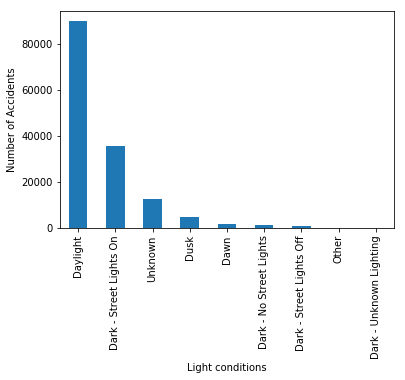

In [104]:
df5['LIGHTCOND'].value_counts().plot('bar')
plt.xlabel('Light conditions')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

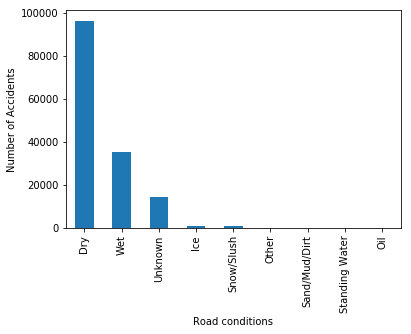

In [105]:
df5['ROADCOND'].value_counts().plot('bar')
plt.xlabel('Road conditions')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

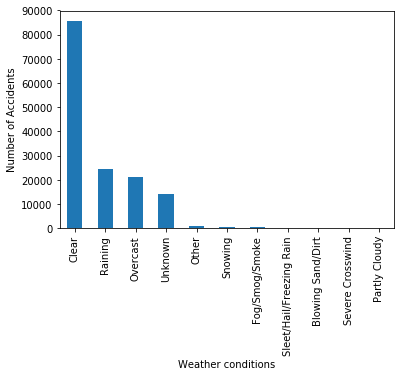

In [106]:
df5['WEATHER'].value_counts().plot('bar')
plt.xlabel('Weather conditions')
plt.ylabel('Number of Accidents')

## Balancing the dataset

We see that the severity code 1 which corresponds to property damage has more entries than severity code 2 which corresponds to injury. Hence we need to balance the dataset.

In [107]:
dfmajor = df5[df5.SEVERITYCODE == 1]
dfminor = df5[df5.SEVERITYCODE == 2]

df_majority_downsampled = resample(dfmajor, 
                                 replace=False,    # sample without replacement
                                 n_samples=43108,     # to match minority class
                                 random_state=5) 
df5 = pd.concat([dfminor, df_majority_downsampled])

Even for different severities, the distribution for the conditions during the accidents are more or less the same. The only information that we get is that **It is more likely to have an injury than Property damage if the road conditions are wet.** So it would be challenging to come up with an appropriate model.

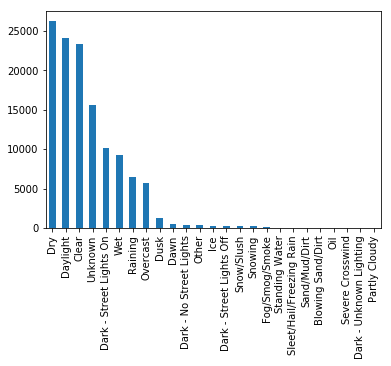

In [108]:
dfanalysismajor = df_majority_downsampled[['WEATHER','LIGHTCOND','ROADCOND']].apply(pd.value_counts)
dfanalysismajor['Total'] = dfanalysismajor.sum(axis=1)
dfanalysismajor.sort_values(by=['Total'],ascending=False,inplace = True)
dfanalysismajor['Total'].plot('bar')

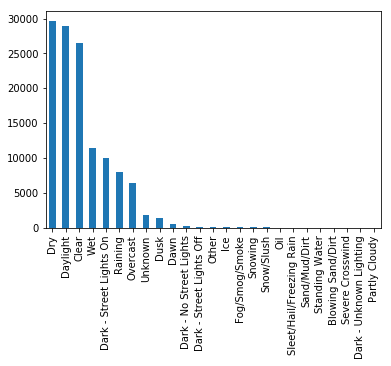

In [109]:
dfanalysisminor = dfminor[['WEATHER','LIGHTCOND','ROADCOND']].apply(pd.value_counts)
dfanalysisminor['Total'] = dfanalysisminor.sum(axis=1)
dfanalysisminor.sort_values(by=['Total'],ascending=False,inplace = True)
dfanalysisminor['Total'].plot('bar')

## Missing values

Our dataset has a large number of missing values for our main attributes. They are listed as 'Unknown' It is not clear what these values should be, so the safest way to deal with them would be to exclude these rows from our analysis. 

In [110]:
print(df5.shape,pd.isna(df5['LIGHTCOND']).sum(),pd.isna(df5['ROADCOND']).sum(),pd.isna(df5['WEATHER']).sum())

(86216, 10) 2667 2612 2634


In [111]:
df6 = df5.dropna(subset = ['LIGHTCOND','ROADCOND','WEATHER'],axis = 0)

As we see, excluding thes rows does not result in a major change in overall entries. 

In [112]:
df6.shape

(83482, 10)

In [113]:
df6 = df6[(df6.WEATHER != 'Unknown')]
print(df6.shape)
df6 = df6[(df6.LIGHTCOND != 'Unknown')]
print(df6.shape)
df6 = df6[(df6.ROADCOND != 'Unknown')]
print(df6.shape)

(77432, 10)
(76328, 10)
(75895, 10)


We need to convert catogorical variables into numerical values.

In [114]:
df6['WEATHER'].replace(to_replace= df6['WEATHER'].unique(), value=list(range(0,10)),inplace=True)
df6['LIGHTCOND'].replace(to_replace= df6['LIGHTCOND'].unique(), value=list(range(0,8)),inplace=True)
df6['ROADCOND'].replace(to_replace= df6['ROADCOND'].unique(), value=list(range(0,8)),inplace=True)

# Machine learning models

Finally, our dataset is ready and we can try to come up with an appopriate supervised Machine Learning model. We go through various preprocessing stages where we split the dataset into Train and Test subsets.
We use the following Machine learnign algorithms:
- K Nearest Neigbors
- Decision Tree
- SVM
- Logistic Regression

In [115]:
X = df6[['LIGHTCOND','ROADCOND','WEATHER']].values
y = df6['SEVERITYCODE']

In [116]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (60716, 3) (60716,)
Test set: (15179, 3) (15179,)


## K nearest Neighbors

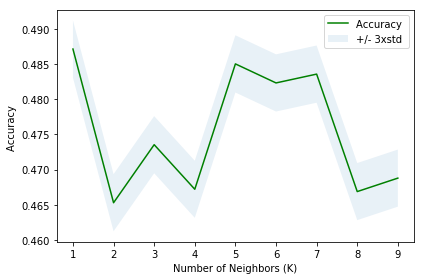

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [119]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

## Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = None)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
f1_score(y_test, predTree, average='weighted') 

DecisionTrees's Accuracy:  0.5404176823242638


0.478945111605913

## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatLR)

0.537518940641676

In [122]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6894236318416841

## SVM

In [123]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhatSVM = clf.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, yhatSVM, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37857480803801546

In [124]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatSVM)

0.5398906383819752

In [125]:
J =[]
F1 = []
LL = []
J.append(jaccard_similarity_score(y_test, yhat))
F1.append(f1_score(y_test, yhat, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, predTree))
F1.append(f1_score(y_test, predTree, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, yhatSVM))
F1.append(f1_score(y_test, yhatSVM, average='weighted')) 
LL.append('N/A')
J.append(jaccard_similarity_score(y_test, yhatLR))
F1.append(f1_score(y_test, yhatLR, average='weighted')) 
LL.append(log_loss(y_test, yhat_prob))
Algorithm = ['KNN','Decision Tree','SVM','LogisticRegression']
J ,F1,LL
data = {'Algorithm': Algorithm,'Jaccard': J,'F1-score':F1,'LogLoss':LL}
pd.DataFrame(data)

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.483563,0.472137,N/A
1,Decision Tree,0.540418,0.478945,N/A
2,SVM,0.539891,0.378575,N/A
3,LogisticRegression,0.537519,0.421673,0.689424


Finally, we compare the performance of each algortihm with different metrics and we select the best performing one which in this case would be the **Decision Tree classifier**. This is expected since the only differentiator in the severity of the accident would be if the road condition, specifically the wet condition.